In [27]:
import numpy as np
import pandas as pd  

In [28]:
import pandas as pd # read the csv
import re # regex to detect username, url, html entity 
import nltk # to use word tokenize (split the sentence into words)
from nltk.corpus import stopwords # to remove the stopwords
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout

from keras.utils import to_categorical
from keras import backend as K


ModuleNotFoundError: No module named 'tensorflow'

In [29]:
data = pd.read_csv("train.csv")

data.head()

,count,hate_speech_count,offensive_language_count,neither_count,class,tweet
0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


In [30]:
# dataset shape to know how many tweets in the datasets
print(f"num of tweets: {data.shape}")

# extract the text and labels
tweet = list(data['tweet'])
labels = list(data['class'])

num of tweets: (24783, 6)


In [31]:
dataset

NameError: name 'dataset' is not defined

In [32]:
data

,count,hate_speech_count,offensive_language_count,neither_count,class,tweet
0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...
...,...,...,...,...,...,...
24778,3,0,2,1,1,you's a muthaf***in lie &#8220;@LifeAsKing: @2...
24779,3,0,1,2,2,"you've gone and broke the wrong heart baby, an..."
24780,3,0,3,0,1,young buck wanna eat!!.. dat nigguh like I ain...
24781,6,0,6,0,1,youu got wild bitches tellin you lies


In [33]:
data.isnull()

,count,hate_speech_count,offensive_language_count,neither_count,class,tweet
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
24778,False,False,False,False,False,False
24779,False,False,False,False,False,False
24780,False,False,False,False,False,False
24781,False,False,False,False,False,False


In [34]:
data.isnull().sum()

count                       0
hate_speech_count           0
offensive_language_count    0
neither_count               0
class                       0
tweet                       0
dtype: int64

In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24783 entries, 0 to 24782
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   count                     24783 non-null  int64 
 1   hate_speech_count         24783 non-null  int64 
 2   offensive_language_count  24783 non-null  int64 
 3   neither_count             24783 non-null  int64 
 4   class                     24783 non-null  int64 
 5   tweet                     24783 non-null  object
dtypes: int64(5), object(1)
memory usage: 1.1+ MB


In [36]:
data.describe()

,count,hate_speech_count,offensive_language_count,neither_count,class
count,24783.000000,24783.000000,24783.000000,24783.000000,24783.000000
mean,3.243473,0.280515,2.413711,0.549247,1.110277
std,0.883060,0.631851,1.399459,1.113299,0.462089
min,3.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,0.000000,2.000000,0.000000,1.000000
50%,3.000000,0.000000,3.000000,0.000000,1.000000
75%,3.000000,0.000000,3.000000,0.000000,1.000000
max,9.000000,7.000000,9.000000,9.000000,2.000000


In [37]:
data["lebels"] = data["class"].map({0 : "Hate Speech",
                                   1: "Offensive language",
                                   2: "No hate or offensive language"})

In [38]:
data


,count,hate_speech_count,offensive_language_count,neither_count,class,tweet,lebels
0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...,No hate or offensive language
1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,Offensive language
2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,Offensive language
3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,Offensive language
4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,Offensive language
...,...,...,...,...,...,...,...
24778,3,0,2,1,1,you's a muthaf***in lie &#8220;@LifeAsKing: @2...,Offensive language
24779,3,0,1,2,2,"you've gone and broke the wrong heart baby, an...",No hate or offensive language
24780,3,0,3,0,1,young buck wanna eat!!.. dat nigguh like I ain...,Offensive language
24781,6,0,6,0,1,youu got wild bitches tellin you lies,Offensive language


In [39]:
data_f = data[["tweet","lebels"]]

In [40]:
data_f

,tweet,lebels
0,!!! RT @mayasolovely: As a woman you shouldn't...,No hate or offensive language
1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,Offensive language
2,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,Offensive language
3,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,Offensive language
4,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,Offensive language
...,...,...
24778,you's a muthaf***in lie &#8220;@LifeAsKing: @2...,Offensive language
24779,"you've gone and broke the wrong heart baby, an...",No hate or offensive language
24780,young buck wanna eat!!.. dat nigguh like I ain...,Offensive language
24781,youu got wild bitches tellin you lies,Offensive language


In [41]:
import re
import nltk
import string

In [42]:
#import stopwords stop words and stemming the words
from nltk.corpus import stopwords
stopwords = set(stopwords.words("english"))

In [43]:
#import stemming

In [44]:
stemmer = nltk.SnowballStemmer("english")

In [45]:

# Data cleaning function
def clean_data(text):
    text = str(text).lower()
    
    # Fixing regex patterns with raw strings (r'...')
    text = re.sub(r'https?://\S+|www\.\S+', '', text)  # Remove URLs
    text = re.sub(r'\[.*?\]', '', text)  # Remove text within square brackets
    text = re.sub(r'<.*?>+', '', text)  # Remove HTML tags
    text = re.sub(r'[%s]' % re.escape(string.punctuation), '', text)  # Remove punctuation
    text = re.sub(r'\n', '', text)  # Remove newlines
    text = re.sub(r'\w*\d\w*', '', text)  # Remove words containing numbers

    # Stopword removal
    text = " ".join([word for word in text.split() if word not in stopwords])

    # Stemming (assuming stemmer is defined elsewhere)
    text = " ".join([stemmer.stem(word) for word in text.split()])

    return text


In [46]:
data_f["tweet"] = data_f["tweet"].apply(clean_data)

C:\Users\kjaye\AppData\Local\Temp\ipykernel_8280\1312706332.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_f["tweet"] = data_f["tweet"].apply(clean_data)


In [47]:
data_f


,tweet,lebels
0,rt mayasolov woman shouldnt complain clean hou...,No hate or offensive language
1,rt boy dat coldtyga dwn bad cuffin dat hoe place,Offensive language
2,rt urkindofbrand dawg rt ever fuck bitch start...,Offensive language
3,rt cganderson vivabas look like tranni,Offensive language
4,rt shenikarobert shit hear might true might fa...,Offensive language
...,...,...
24778,yous muthafin lie coreyemanuel right tl trash ...,Offensive language
24779,youv gone broke wrong heart babi drove redneck...,No hate or offensive language
24780,young buck wanna eat dat nigguh like aint fuck...,Offensive language
24781,youu got wild bitch tellin lie,Offensive language


In [48]:
X = np.array(data_f["tweet"])
Y = np.array(data_f["lebels"])

In [49]:
X

array(['rt mayasolov woman shouldnt complain clean hous amp man alway take trash',
       'rt boy dat coldtyga dwn bad cuffin dat hoe place',
       'rt urkindofbrand dawg rt ever fuck bitch start cri confus shit',
       ..., 'young buck wanna eat dat nigguh like aint fuckin dis',
       'youu got wild bitch tellin lie',
       'ruffl ntac eileen dahlia beauti color combin pink orang yellow amp white coll'],
      shape=(24783,), dtype=object)

In [50]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

In [51]:
cv = CountVectorizer()
X = cv.fit_transform(X)

In [52]:
X

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 197862 stored elements and shape (24783, 25693)>

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

In [54]:
X_train

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 132620 stored elements and shape (16604, 25693)>

In [55]:
#building out ML model
from sklearn.tree import DecisionTreeClassifier

In [56]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [57]:
y_pred = dt.predict(X_test)

In [58]:
#confusion matrix and accuracy
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[ 149,   39,  277],
       [  29, 1127,  223],
       [ 235,  232, 5868]])

In [73]:
!pip show seaborn
#to install seaborn

Name: seaborn
Version: 0.13.2
Summary: Statistical data visualization
Home-page: 
Author: 
Author-email: Michael Waskom <mwaskom@gmail.com>
License: 
Location: c:\users\kjaye\appdata\roaming\python\python310\site-packages
Requires: matplotlib, numpy, pandas
Required-by: 


In [60]:
import sys
!{sys.executable} -m pip install seaborn

In [61]:
!pip show seaborn


Name: seaborn
Version: 0.13.2
Summary: Statistical data visualization
Home-page: 
Author: 
Author-email: Michael Waskom <mwaskom@gmail.com>
License: 
Location: c:\users\kjaye\appdata\roaming\python\python310\site-packages
Requires: matplotlib, numpy, pandas
Required-by: 


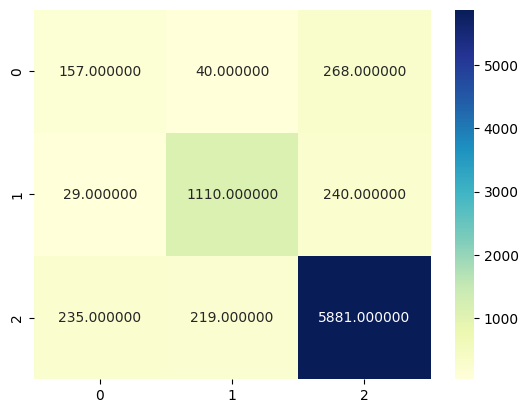

In [62]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Define the confusion matrix (or correlation matrix)
cm = np.array([[157, 40, 268],
               [29, 1110, 240],
               [235, 219, 5881]])

# Plot heatmap
sns.heatmap(cm, annot=True, fmt=".6f", cmap="YlGnBu")  # fmt=".6f" ensures similar decimal formatting
plt.show()


In [63]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris

# Load dataset
data = load_iris()
X, y = data.data, data.target

# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a model (example: RandomForestClassifier)
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 1.0


In [68]:
import re

def clean_data(text):
    """Function to clean input text."""
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)  # Remove punctuation
    return text

# Example usage
sample = "Let's unite and kill all the people who are protesting against the government"
sample = clean_data(sample)
print(sample)


lets unite and kill all the people who are protesting against the government


In [67]:
sample


'lets unite and kill all the people who are protesting against the government'

In [71]:
data1 = cv.transform([sample]).toarray()

In [69]:
data1

array([[0, 0, 0, ..., 0, 0, 0]], shape=(1, 25693))